`Bag-of-words` is a special case of `n-grams` where the value of `n` is `1`.


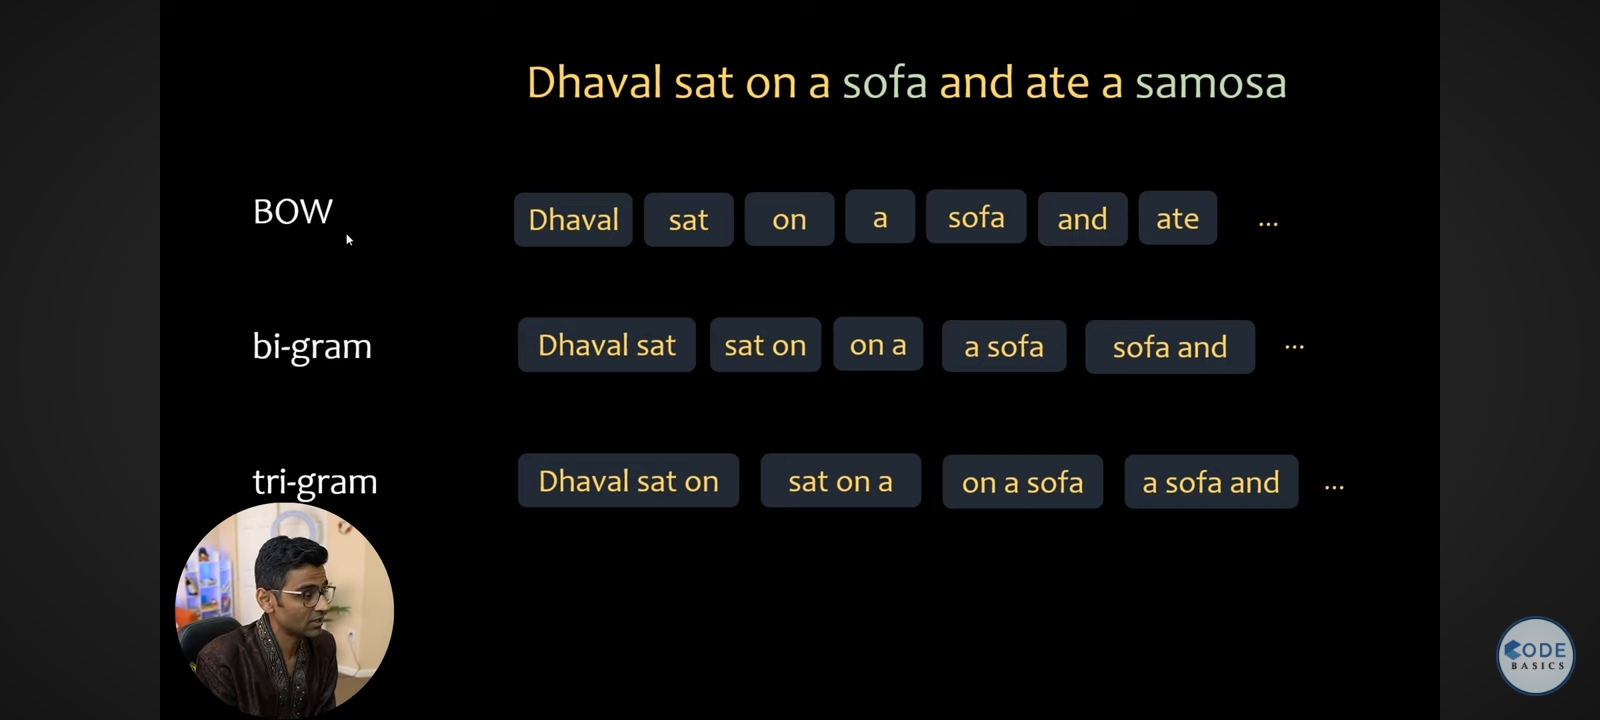

`Bag of words` model or `count vectorizer` model with `one-gram`

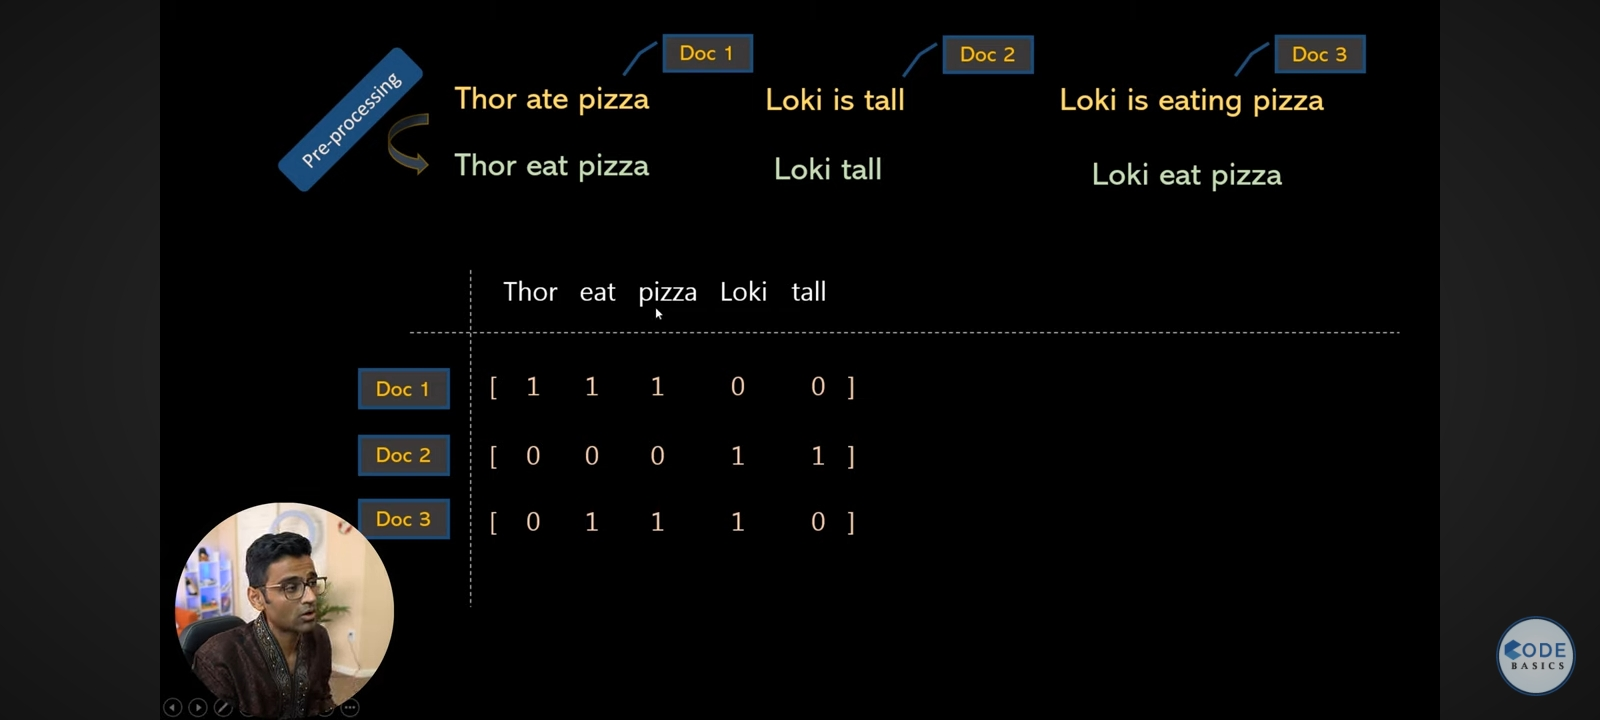

`Bag of words` model with `bi-grams`

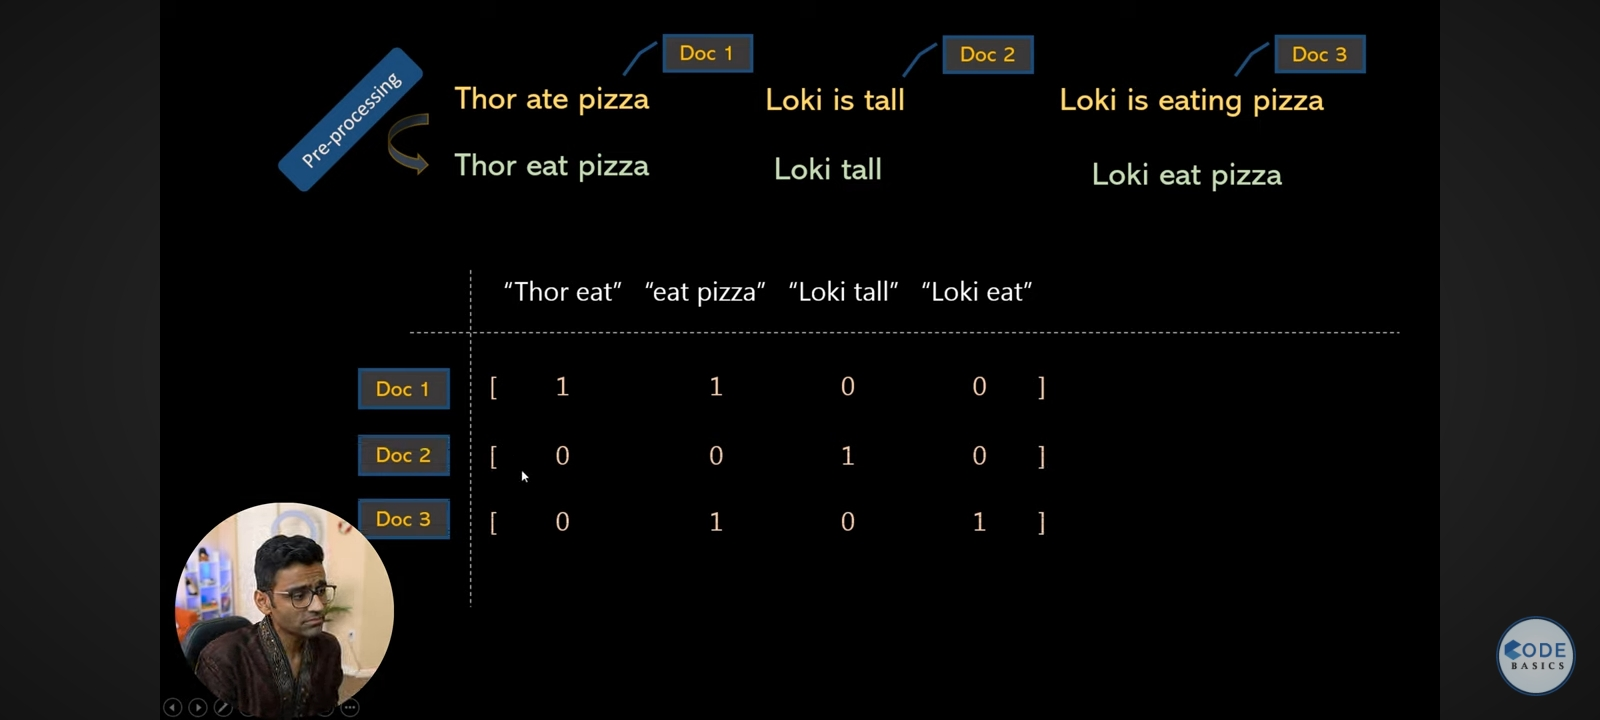

`Bag of words` model with `one-gram` and `bi-gram`.

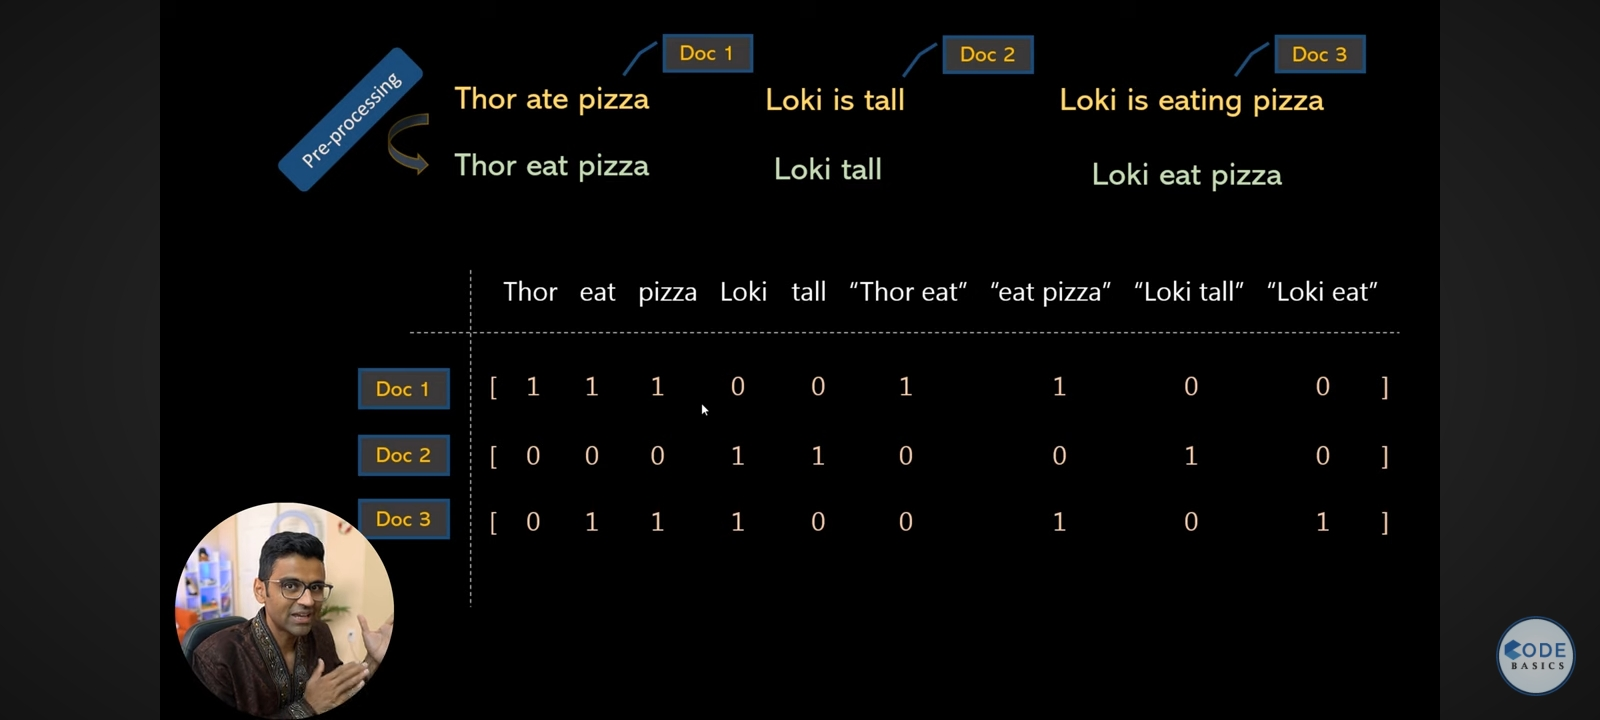

#### Limitations of bag of n-grams model

- As n increased, dimensionality, sparsity increases.
- Doesn't address out of vocabulary problem.

## Practice

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

Index is assign to each word alphabetically, which will be used when we creates the vector for it.


In [ ]:
# using n-gram ---> bi-gram

v = CountVectorizer(ngram_range=(2,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [ ]:
# (one-gram, bi-gram)

v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [ ]:
# (one-gram, bi-gram, tri-gram)

v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

## Creating a vector space model.

In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [ ]:
import spacy

# loading English language model and create nlp object form it
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
  doc = nlp(text)

  filtered_tokens = []

  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append((token.lemma_)) # doing lemmatization

  return " ".join(filtered_tokens)

In [ ]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [ ]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed) # fit() method will create the vocabulary.
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [ ]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

this is a `vector`. `1` represents word present in vocabulary and `0` represents word is not present.

In [ ]:
# for example
v.transform(["Hulk is running"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
import pandas as pd

df = pd.read_json('news_dataset.json')

In [ ]:
df.shape

(12695, 2)

In [ ]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [ ]:
df['category'].value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381


In [ ]:
# balancing the class with undersampling

min_samples = 1381

df_business = df[df['category'] == 'BUSINESS'].sample(min_samples, random_state=0)
df_sports = df[df['category'] == 'SPORTS'].sample(min_samples, random_state=1)
df_crime = df[df['category'] == 'CRIME'].sample(min_samples, random_state=2)
df_science = df[df['category'] == 'SCIENCE'].sample(min_samples, random_state=3)

In [ ]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis=0)
df_balanced.category.value_counts()

,count
category,
BUSINESS,1381
SPORTS,1381
CRIME,1381
SCIENCE,1381


In [ ]:
df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'SCIENCE': 3
})

In [ ]:
df_balanced.head()

,text,category,category_num
5790,Recycling Opens the Door to a Circular Economy...,BUSINESS,0
6168,Beyond Silicon Valley: Using a MOOC to Build a...,BUSINESS,0
2965,Obstacles for Women in Business: The Comfort P...,BUSINESS,0
9320,Tesla Investigating Second Reported Crash In A...,BUSINESS,0
3743,The Places That Most Desperately Need A Higher...,BUSINESS,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['text'],
    df_balanced['category_num'],
    test_size=0.2,
    random_state=10,
    stratify=df_balanced.category_num # It will create equal number of samples from all classes in train and test.
)

In [ ]:
y_train.value_counts()

,count
category_num,
3,1105
0,1105
2,1105
1,1104


In [ ]:
y_test.value_counts()

,count
category_num,
1,277
3,276
0,276
2,276


In [ ]:
# building the model with pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

clf = Pipeline([
    ('vectorizer', CountVectorizer()), # Stage-1: creating bag of words
    ('Multi NB', MultinomialNB()) # Stage-2
])

clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Multi NB', MultinomialNB())])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8823529411764706
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       276
           1       0.92      0.88      0.90       277
           2       0.87      0.88      0.88       276
           3       0.93      0.85      0.89       276

    accuracy                           0.88      1105
   macro avg       0.89      0.88      0.88      1105
weighted avg       0.89      0.88      0.88      1105



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))), # Stage-1: creating bag of words
    ('Multi NB', MultinomialNB()) # Stage-2
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8714932126696833
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       276
           1       0.95      0.84      0.89       277
           2       0.88      0.89      0.89       276
           3       0.93      0.83      0.88       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



## Exercise

In [ ]:
!unzip /content/Fake.csv.zip

Archive:  /content/Fake.csv.zip
  inflating: Fake.csv                


In [ ]:
import pandas as pd
import numpy as np